# With Dec=5e-10,5e-12, and others with Andrew's value

In [2]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;
from scipy.io import savemat,loadmat;from pybamm import constants,exp,tanh,sqrt;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import traceback
import imageio.v2 as imageio


In [3]:
import sys  
str_path_0 = os.path.abspath(os.path.join(pybamm.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P2"))
sys.path.append(str_path_1) 
from Fun_P2_Crack_simp import (
    GetScan,
    recursive_scan,
    GetSol_dict,
    Para_init,
    Run_model_wwo_dry_out ,
    Cal_new_con_Update,
    Run_Model_Base_On_Last_Solution,
    Run_Model_Base_On_Last_Solution_RPT,
    write_excel_xlsx,
    Get_initial_cap,
    Get_initial_cap2,
    Plot_Loc_Var_sol
)

In [4]:
V_max = 4.2;        V_min = 2.5;
total_cycle = 500; save_at_cycles= 1
Experiment_short   = pybamm.Experiment( [ (
    f"Discharge at 1 C until {V_min} V", 
    f"Charge at 1 C until {V_max} V", 
    f"Hold at {V_max} V until C/5")    ] * 1 ) 
Experiment_s   = pybamm.Experiment( [ (
    f"Discharge at 1 C for 240 s", )    ] * 1 )   

In [5]:
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P3R5/'; 
Target  = 'a1_3_dd_Dec/'
if not os.path.exists(BasicPath + Target):
    os.mkdir(BasicPath + Target);

In [6]:
model = pybamm.lithium_ion.DFN(     
    options={  
        "solvent diffusion": "EC wo refill"     } )
Dec_all = [5e-10,2e-11,5e-12]
Dcross  = 3e-11

using EC wo refill for Li+


Para_0.search('mole')

In [7]:
ChemistryChen=pybamm.parameter_sets.Chen2020 
ChemistryChen["electrolyte"] = "lipf6_Nyman2008Exp";
Para_0=pybamm.ParameterValues(chemistry=ChemistryChen);
Para_0['EC transference number'] =     -1.4
Para_0['Cation transference number'] =     0.28
#Para_0['EC Lithium ion cross diffusivity [m2.s-1]'] = 1e-14
#Para_0['Typical EC Lithium ion cross diffusivity [m2.s-1]'] =  1e-14

Para_0['EC Lithium ion cross diffusivity [m2.s-1]'] = Dcross
Para_0['Typical EC Lithium ion cross diffusivity [m2.s-1]'] =  Dcross
Para_0['Electrolyte diffusivity [m2.s-1]'] =  3e-10
#print(Model_d.options["solvent diffusion"])
Para_0['Ratio of lithium moles to SEI moles'] =  1

c_e = model.variables["Electrolyte concentration [mol.m-3]"]
T = model.variables["Cell temperature [K]"]
c_EC = model.variables["EC concentration [mol.m-3]"]
model.variables["c(EC) over c(Li+)"] = c_EC / c_e
model.variables["Electrolyte conductivity [S.m-1]"] =(
    Para_0['Electrolyte conductivity [S.m-1]'](c_e,c_EC, T))
    #model.variables["Electrolyte diffusivity [m2.s-1]"] =(
    #    Para_0['Electrolyte diffusivity [m2.s-1]'](c_e,c_EC, T))

Xi =  list(np.linspace(-1.8, -1.0, 10))
print(type(Xi))

In [8]:
Sim = [];Sol=[]; 
for Dec in Dec_all:
    Para_0['EC diffusivity in electrolyte [m2.s-1]'] =  Dec
    sim = pybamm.Simulation(
        model, experiment = Experiment_short,
        parameter_values = Para_0,
        solver = pybamm.CasadiSolver(),)  
    try:
        sol = sim.solve(save_at_cycles=save_at_cycles,);
    except:
        print('Fail for Dec= ',Dec)
    else:
        Sol.append(sol)   
        print('Succeed for Dec= ',Dec)

Succeed for Dec=  5e-10
Succeed for Dec=  2e-11
Succeed for Dec=  5e-12


print(Sol_ddiff["Electrolyte conductivity [S.m-1]"].entries[:,51] )
print(Sol_ddiff["Electrolyte diffusivity [m2.s-1]"].entries[:,-1])

In [9]:
font = {'family' : 'DejaVu Sans','size': fs}
mpl.rc('font', **font)

In [10]:

output_variables3 = [
    "Terminal voltage [V]",   
    "c(EC) over c(Li+)",
    "EC concentration",
    "Electrolyte concentration",
    "Li+ flux [mol.m-2.s-1]",
    "EC flux [mol.m-2.s-1]",
]
quick_plot = pybamm.QuickPlot(
    Sol[1], 
    output_variables3,
    variable_limits='fixed',time_unit='hours',n_rows=2,
    figsize = (12,8)) #     spatial_unit='mm',
quick_plot.dynamic_plot();
#quick_plot.plot(0.5)
#quick_plot.fig.savefig(BasicPath + Target+"t_0+_three_cases.png", dpi=600)
#quick_plot.create_gif(
#    number_of_images=10, duration=2,output_filename=BasicPath + Target+"concentration and flux.gif")

interactive(children=(FloatSlider(value=0.0, description='t', max=2.1689329314643513, step=0.02168932931464351…

In [11]:
label = [Dec for Dec in Dec_all]
output_variables3 = [
    "Terminal voltage [V]",   
    "Discharge capacity [A.h]",
    "EC concentration [mol.m-3]",
    "Electrolyte concentration [mol.m-3]",
    "Li+ flux [mol.m-2.s-1]",
    "EC flux [mol.m-2.s-1]",
]
quick_plot = pybamm.QuickPlot(
    [sol for sol in Sol], 
    output_variables3,label,
    variable_limits='fixed',time_unit='hours',n_rows=2,
    figsize = (12,8)) #     spatial_unit='mm',
quick_plot.dynamic_plot();
#quick_plot.plot(0.5)
#quick_plot.fig.savefig(BasicPath + Target+"t_0+_three_cases.png", dpi=600)
#quick_plot.create_gif(
#    number_of_images=10, duration=2,output_filename=BasicPath + Target+"concentration and flux.gif")

interactive(children=(FloatSlider(value=0.0, description='t', max=2.18554631819456, step=0.0218554631819456), …

In [12]:
label = [Dec for Dec in Dec_all]
output_variables3 = [
    #"Terminal voltage [V]",   
    "EC flux [mol.m-2.s-1]",
    "EC flux by diffusion [mol.m-2.s-1]",
    "EC flux by migration [mol.m-2.s-1]",
    "EC flux by Li+ [mol.m-2.s-1]",
    "Li+ flux [mol.m-2.s-1]",
    "Li+ flux by diffusion [mol.m-2.s-1]",
    "Li+ flux by migration [mol.m-2.s-1]",
    "Li+ flux by solvent [mol.m-2.s-1]",      
]
quick_plot = pybamm.QuickPlot(
    [sol for sol in Sol], 
    output_variables3,label,
    variable_limits='tight',time_unit='hours',n_rows=2,
    figsize = (12,6)) #     spatial_unit='mm',
quick_plot.dynamic_plot();
#quick_plot.plot(0.5)
#quick_plot.fig.savefig(BasicPath + Target+"t_0+_three_cases.png", dpi=600)
#quick_plot.create_gif(
#    number_of_images=10, duration=2,output_filename=BasicPath + Target+"flux contribution.gif")

interactive(children=(FloatSlider(value=0.0, description='t', max=2.18554631819456, step=0.0218554631819456), …

In [13]:
label = [Dec for Dec in Dec_all]
output_variables3 = [
    "Electrolyte concentration",
    "Minus div Li+ flux",
    "Li+ source term",
    "Minus div Li+ flux by diffusion",
    "Minus div Li+ flux by migration",
    "Minus div Li+ flux by solvent",
    #"Li+ source term refill",
]
quick_plot = pybamm.QuickPlot(
    [sol for sol in Sol], 
    output_variables3,label,
    variable_limits='tight',time_unit='hours',n_rows=2,
    figsize = (12,9)) #     spatial_unit='mm',
quick_plot.dynamic_plot();
#quick_plot.create_gif(
#    number_of_images=10, duration=2,output_filename=BasicPath + Target+"Li+ rhs contribution.gif")

interactive(children=(FloatSlider(value=0.0, description='t', max=2.18554631819456, step=0.0218554631819456), …

In [14]:
label = [Dec for Dec in Dec_all]
output_variables3 = [
    "EC concentration",
    "EC source term (SEI)",
    "Minus div EC flux",
    "Minus div EC flux by diffusion",
    "Minus div EC flux by migration",
    "Minus div EC flux by Li+",
    #"Li+ source term refill",
]
quick_plot = pybamm.QuickPlot(
    [sol for sol in Sol], 
    output_variables3,label,
    variable_limits='fixed',time_unit='hours',n_rows=2,
    figsize = (12,9)) #     spatial_unit='mm',
quick_plot.dynamic_plot();
#quick_plot.create_gif(
#    number_of_images=10, duration=2,output_filename=BasicPath + Target+"EC rhs contribution.gif")

interactive(children=(FloatSlider(value=0.0, description='t', max=2.18554631819456, step=0.0218554631819456), …

In [20]:
font = {'family' : 'DejaVu Sans','size': 24}
mpl.rc('font', **font)

In [24]:
# Plot a pair of loc dependent varibles - within one step
def Plot_Loc_Var_sol( sol,x_loc_all, key_all, cycle, step,colormap  ): # for initial solution object
    Num_subplot = len(key_all); # must have 2+ keys
    fig, axs = plt.subplots(1,Num_subplot, figsize=(4*Num_subplot,5),tight_layout=True)
    for i in range(0,Num_subplot):
        x_loc=x_loc_all[i]; key=key_all[i];
        LinesNmum = len(sol.cycles[cycle].steps[step][key].entries[0,:] )
        cmap_i = mpl.cm.get_cmap(colormap, LinesNmum) 
        for j in range(0,LinesNmum):
            axs[i].plot(
                sol.cycles[cycle].steps[step][x_loc].entries[:,0], 
                sol.cycles[cycle].steps[step][key].entries[:,j], '-',
                color=cmap_i(j),)
            axs[i].set_title(key ,   fontdict={'family':'DejaVu Sans','size':fs-1})
            #axs[1].set_ylabel("Potential [V]",   fontdict={'family':'DejaVu Sans','size':fs})
            axs[i].set_xlabel(x_loc,   fontdict={'family':'DejaVu Sans','size':fs})
            
            labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); [label.set_fontname('DejaVu Sans') for label in labels]
            
            axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[i].ticklabel_format( axis='x', style='sci',scilimits=[-0.01,0.01], useOffset=None, useLocale=None, useMathText=None)
            #axs[i].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  
    return  fig, axs 

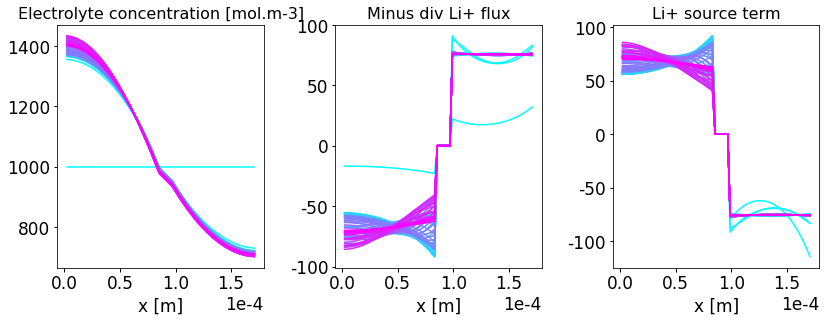

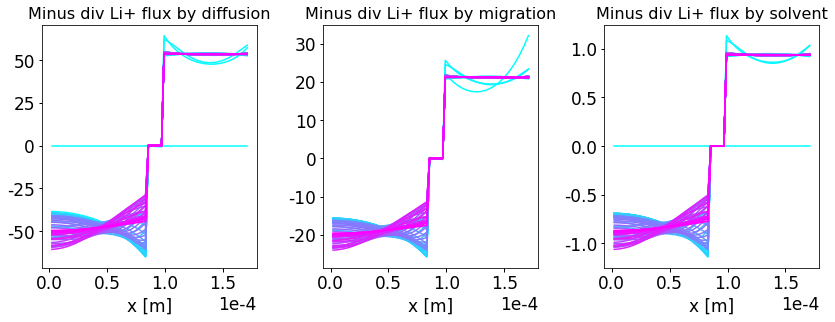

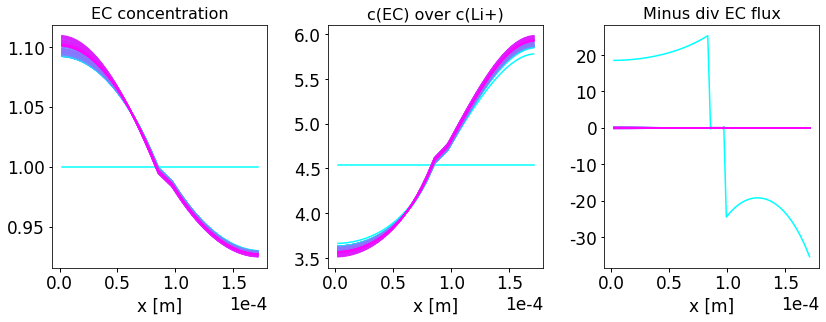

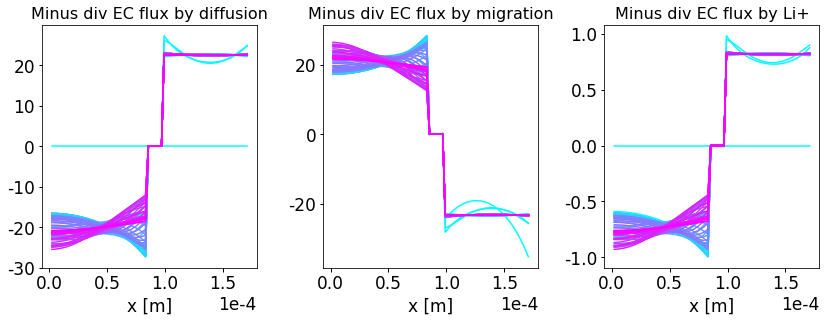

In [28]:
# plot for the 1st value
fig, axs= Plot_Loc_Var_sol(
    Sol[0],
    ["x [m]","x [m]","x [m]",], 
    ["Electrolyte concentration [mol.m-3]",
    "Minus div Li+ flux","Li+ source term",], 
    0,0,'cool')
#plt.savefig(BasicPath + Target+"SEI Volume ratio- compare different cycles.png", dpi=600)
fig, axs= Plot_Loc_Var_sol(
    Sol[0],
    ["x [m]","x [m]","x [m]",], 
    ["Minus div Li+ flux by diffusion",
    "Minus div Li+ flux by migration",
    "Minus div Li+ flux by solvent",], 
    0,0,'cool')

fig, axs = Plot_Loc_Var_sol(
    Sol[0],
    ["x [m]","x [m]","x [m]",], 
    ["EC concentration",
    "c(EC) over c(Li+)",
    "Minus div EC flux",], 
    0,0,'cool')
fig, axs = Plot_Loc_Var_sol(
    Sol[0],
    ["x [m]","x [m]","x [m]",], 
    ["Minus div EC flux by diffusion",
    "Minus div EC flux by migration",
    "Minus div EC flux by Li+",], 
    0,0,'cool')

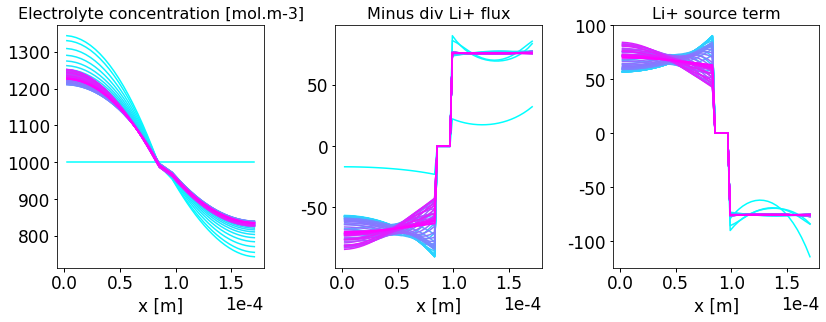

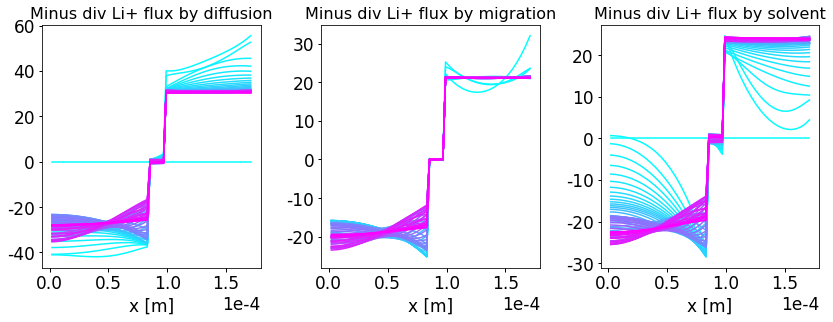

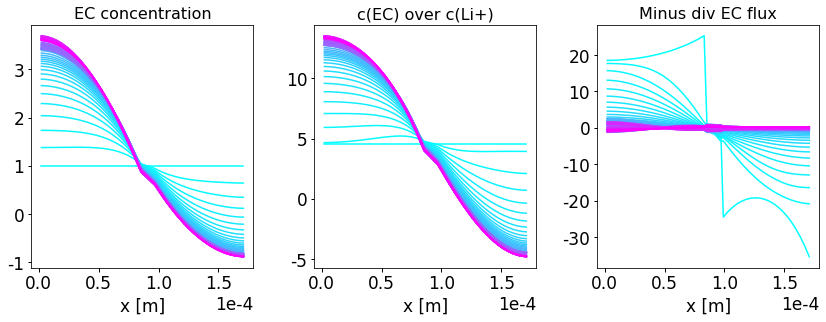

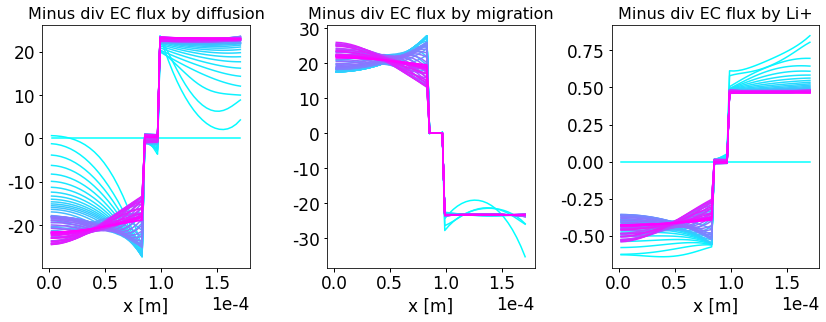

In [25]:
# plot for the 2nd value
fig, axs= Plot_Loc_Var_sol(
    Sol[1],
    ["x [m]","x [m]","x [m]",], 
    ["Electrolyte concentration [mol.m-3]",
    "Minus div Li+ flux","Li+ source term",], 
    0,0,'cool')
fig, axs= Plot_Loc_Var_sol(
    Sol[1],
    ["x [m]","x [m]","x [m]",], 
    ["Minus div Li+ flux by diffusion",
    "Minus div Li+ flux by migration",
    "Minus div Li+ flux by solvent",], 
    0,0,'cool')

fig, axs = Plot_Loc_Var_sol(
    Sol[1],
    ["x [m]","x [m]","x [m]",], 
    ["EC concentration",
    "c(EC) over c(Li+)",
    "Minus div EC flux",], 
    0,0,'cool')
fig, axs = Plot_Loc_Var_sol(
    Sol[1],
    ["x [m]","x [m]","x [m]",], 
    ["Minus div EC flux by diffusion",
    "Minus div EC flux by migration",
    "Minus div EC flux by Li+",], 
    0,0,'cool')